In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import os
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Loading the text file
fold_df = pd.read_csv("../input/breakhis/Folds.csv")

In [3]:
#Importing all the necessary libraries for image processing
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#Defining the paths
img_path = "./BreaKHis_v1/"
classes = ["benign","malign"]

In [5]:
#Renaming the column filename to path
fold_df = fold_df.rename(columns = {"filename":"path"})
#Printing the head of the file
fold_df.head(3)

fold  mag    grp                                               path
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...
1     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...
2     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...

In [6]:
fold_df['path'][1]

'BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png'

In [7]:
#Extracting the filename and label from the path column
fold_df['filename'] = fold_df['path'].apply(lambda x:x.split("/")[-1])
fold_df["label"] = fold_df['path'].apply(lambda x: x.split("/")[3])

In [8]:
fold_df.head(3)

fold  mag    grp                                               path  \
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
1     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
2     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   

                         filename   label  
0  SOB_B_A-14-22549AB-100-001.png  benign  
1  SOB_B_A-14-22549AB-100-002.png  benign  
2  SOB_B_A-14-22549AB-100-003.png  benign

In [9]:
os.makedirs("../Cancer/")

In [10]:
#Moving all the images to one folder
for p in fold_df['path']:
    src = "../input/breakhis/BreaKHis_v1/" + p
    dest = "../Cancer/"
    #saving the files with its corresponding class and patient_id
    dest = os.path.join(dest,src.split("/")[7]+ "_" + src.split("/")[-1])
    shutil.copyfile(src,dest)    

In [11]:
len(os.listdir("../Cancer/"))

7909

In [12]:
#Creating a new data frame with labels and file names stored in single folder
fold_df['file_loc'] = fold_df['label'] + "_" + fold_df['filename']
#Encoding the class to integer
fold_df['class'] = fold_df['label'].apply(lambda x: 0 if x =='benign' else 1)

In [13]:
fold_df.head(3)

fold  mag    grp                                               path  \
0     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
1     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   
2     1  100  train  BreaKHis_v1/histology_slides/breast/benign/SOB...   

                         filename   label  \
0  SOB_B_A-14-22549AB-100-001.png  benign   
1  SOB_B_A-14-22549AB-100-002.png  benign   
2  SOB_B_A-14-22549AB-100-003.png  benign   

                                file_loc  class  
0  benign_SOB_B_A-14-22549AB-100-001.png      0  
1  benign_SOB_B_A-14-22549AB-100-002.png      0  
2  benign_SOB_B_A-14-22549AB-100-003.png      0

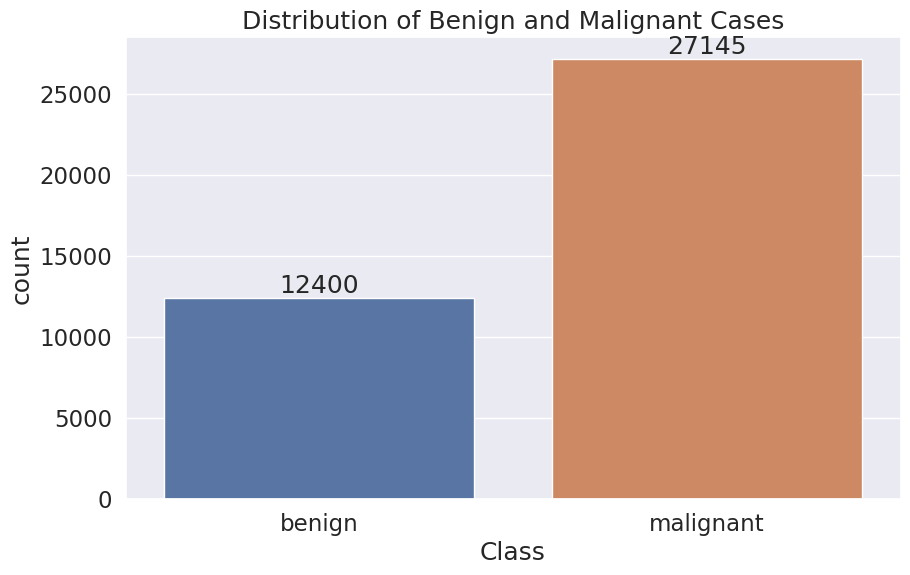


Class Distribution:
label
malignant    27145
benign       12400
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")


sns.countplot(data=fold_df, x='label')

plt.xlabel("Class")
plt.title("Distribution of Benign and Malignant Cases")
plt.xticks(rotation=0)

for i in plt.gca().containers:
    plt.gca().bar_label(i)

plt.show()

print("\nClass Distribution:")
print(fold_df['label'].value_counts())

In [15]:
benign_df = fold_df[fold_df['label'] == 'benign']
malignant_df = fold_df[fold_df['label'] == 'malignant']

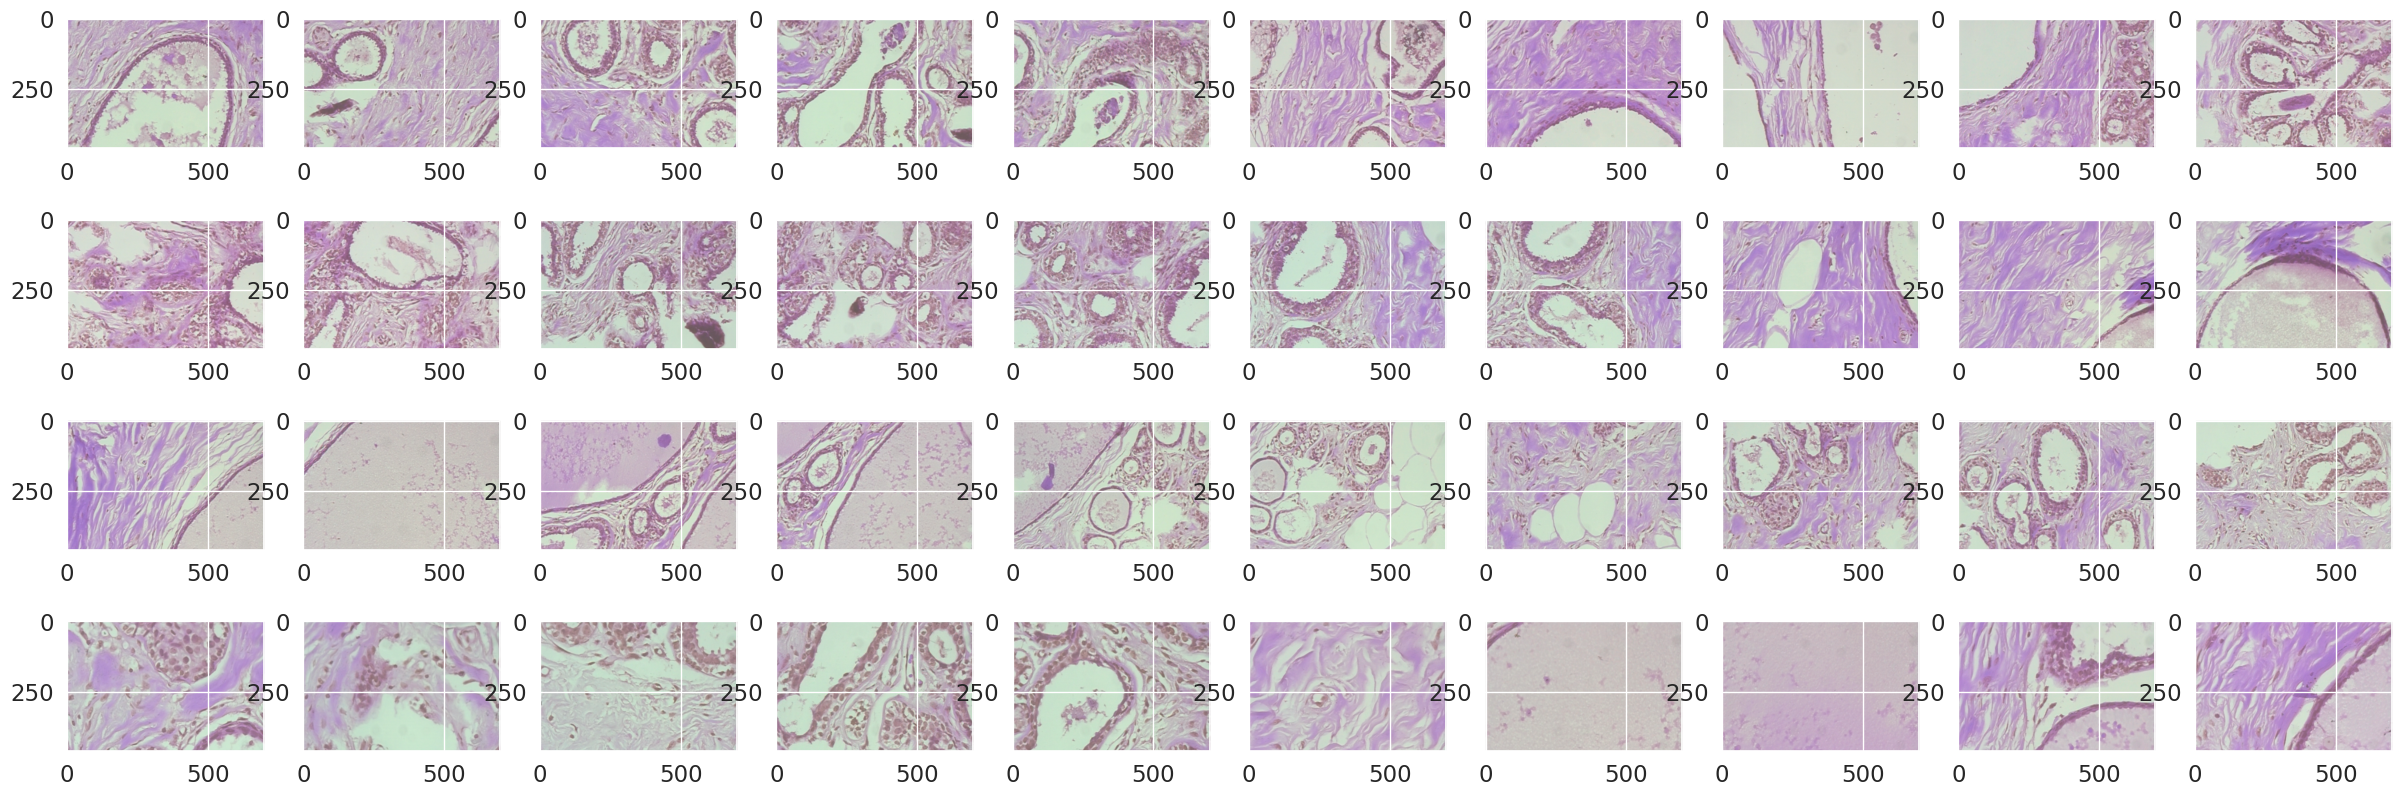

In [16]:
#Plotting the benign samples
plt.figure(figsize = (30,10))
for i in range(0,40):
    plt.subplot(4,10,i+1)
    img = cv2.imread("../Cancer/"+ benign_df['file_loc'][i],1)
    plt.imshow(img)

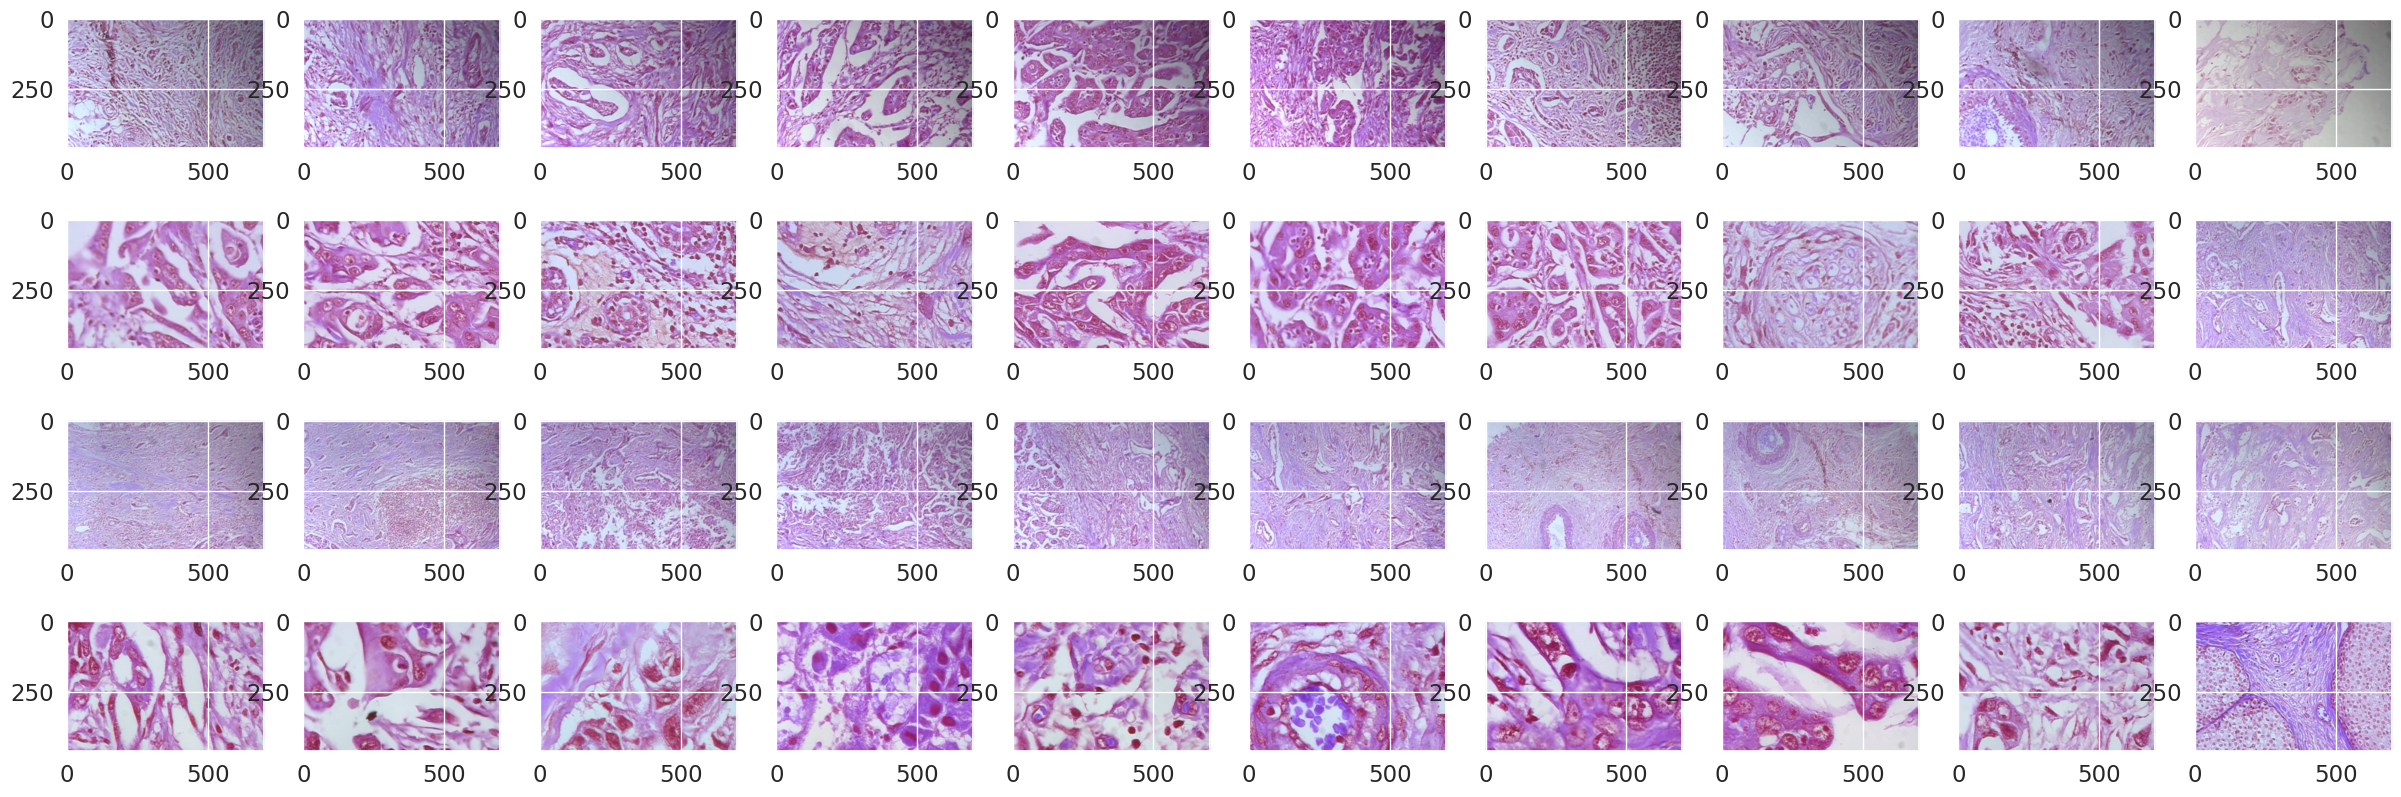

In [17]:
#Plotting the malignant samples
images = malignant_df['file_loc'].values
plt.figure(figsize = (30,10))
for i in range(0,40):
    plt.subplot(4,10,i+1)
    img = cv2.imread("../Cancer/"+ images[i],1)
    plt.imshow(img)

In [18]:
df = pd.DataFrame(os.listdir("../Cancer/"))
df = df.rename(columns = {0:'file_loc'})
df['label'] = df['file_loc'].apply(lambda x:x.split("_")[0])
df['class'] = df['label'].apply(lambda x: 0 if x =='benign' else 1)
df.set_index("file_loc",inplace=True)

In [19]:
df

label  class
file_loc                                                  
malignant_SOB_M_PC-14-12465-100-013.png   malignant      1
malignant_SOB_M_LC-14-15570C-100-002.png  malignant      1
malignant_SOB_M_MC-14-19979C-400-007.png  malignant      1
malignant_SOB_M_LC-14-13412-100-018.png   malignant      1
malignant_SOB_M_DC-14-20636-200-026.png   malignant      1
...                                             ...    ...
malignant_SOB_M_DC-14-20636-40-008.png    malignant      1
malignant_SOB_M_DC-14-8168-400-003.png    malignant      1
malignant_SOB_M_DC-14-14926-100-012.png   malignant      1
benign_SOB_B_PT-14-22704-40-037.png          benign      0
malignant_SOB_M_DC-14-10926-400-008.png   malignant      1

[7909 rows x 2 columns]

In [20]:
#Performing the splitting
data_train_and_val, data_test = train_test_split(df, test_size = 0.1, random_state = 47)
#Traing and val
data_train, data_val = train_test_split(data_train_and_val, test_size = 0.1, random_state = 47)

In [21]:
print("Training size :", data_train.shape)
print("Validation size :", data_val.shape)
print("Testing size :", data_test.shape)

Training size : (6406, 2)
Validation size : (712, 2)
Testing size : (791, 2)


In [22]:
train_has_cancer = data_train[data_train['class'] == 1]
train_has_no_cancer = data_train[data_train['class'] == 0]

In [23]:
train_has_cancer.shape

(4398, 2)

In [24]:
train_has_no_cancer.shape

(2008, 2)

In [25]:
train_has_no_cancer_upsample = resample(train_has_no_cancer, n_samples = len(train_has_cancer), 
                                     random_state = 47, replace = True)


> **In datasets with class imbalance, the model may become biased toward the majority class.By upsampling the minority class, you create a balanced dataset that allows the model to learn equally from both classes.**


In [26]:
data_train = pd.concat([train_has_cancer,train_has_no_cancer_upsample])

In [27]:
os.makedirs("../Cancer_train")
os.makedirs("../Cancer_test")
os.makedirs("../Cancer_validation")
os.makedirs("../Cancer_train/benign")
os.makedirs("../Cancer_train/malignant")
os.makedirs("../Cancer_validation/benign")
os.makedirs("../Cancer_validation/malignant")
os.makedirs("../Cancer_test/benign")
os.makedirs("../Cancer_test/malignant")

In [28]:
i = 1
for img in data_train.index:
    if img!=".DS_Store":
        target = df.loc[img,'class']
        if target == 1:
            label = 'malignant'
        else:          
            label = 'benign'      
        src = os.path.join("../Cancer/",img)
        dest = os.path.join("../Cancer_train/",label, "image" + str(i)+".png")
        img1 = np.array(cv2.imread(src))
        cv2.imwrite(dest,img1)
        i = i+1

In [29]:
for img in data_val.index:
    target = data_val.loc[img,'class']
    if target == 1:
        label = 'malignant'
    else:
        label = 'benign'
        
    src = os.path.join("../Cancer/",img)
    dest = os.path.join("../Cancer_validation/",label,img)
    shutil.copyfile(src,dest)

In [30]:
for img in data_test.index:
    target = data_test.loc[img,'class']
    if target == 1:
        label = 'malignant'
    else:
        label = 'benign'
        
    src = os.path.join("../Cancer/",img)
    dest = os.path.join("../Cancer_test/",label,img)
    shutil.copyfile(src,dest)

In [31]:
print("Training Data:")
print(" ")
print("Benign:",len(os.listdir("../Cancer_train/benign/")))
print("Malignant::",len(os.listdir("../Cancer_train/malignant/")))
print(" ")
print("Validation Data")
print(" ")
print("Benign size:",len(os.listdir("../Cancer_validation/benign/")))
print("Malignant size :",len(os.listdir("../Cancer_validation/malignant/")))
print(" ")
print("Testing Data:")
print(" ")
print("Benign size :",len(os.listdir("../Cancer_test/benign/")))
print("Malignant size :",len(os.listdir("../Cancer_test/malignant/")))

Training Data:
 
Benign: 4398
Malignant:: 4398
 
Validation Data
 
Benign size: 211
Malignant size : 501
 
Testing Data:
 
Benign size : 261
Malignant size : 530


In [32]:
import wandb
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("wandb")
wandb.login(key=secret_value_0)


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: bunnyyss09 (manvanth_reddy). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [33]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

from PIL import ImageFile
from tqdm import tqdm

# Avoid PIL errors with large images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Initialize Weights & Biases
wandb.init(project="breast-cancer-classification-main", config={
    "epochs": 10,
    "batch_size": 32,
    "learning_rate": 0.001,
    "img_size": 128,
    "model": "resnet50",
    "optimizer": "adam",
})
config = wandb.config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

wandb: Tracking run with wandb version 0.19.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250307_145234-a5485msi
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run vague-microwave-6
wandb: ⭐️ View project at https://wandb.ai/manvanth_reddy/breast-cancer-classification-main
wandb: 🚀 View run at https://wandb.ai/manvanth_reddy/breast-cancer-classification-main/runs/a5485msi


In [34]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [35]:
def log_confusion_matrix(y_true, y_pred, epoch=None):
    """
    Create and log confusion matrix to wandb
    """
    cm = confusion_matrix(y_true, y_pred)
    
    # Create confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Log to wandb
    if epoch is not None:
        wandb.log({f"Confusion Matrix Epoch {epoch}": wandb.Image(plt)})
    else:
        wandb.log({"Final Confusion Matrix": wandb.Image(plt)})
    plt.close()

In [36]:
def log_roc_curve(y_true, y_prob, epoch=None):
    """
    Create and log ROC curve to wandb
    """
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    
    # Log to wandb
    if epoch is not None:
        wandb.log({
            f"ROC Curve Epoch {epoch}": wandb.Image(plt),
            f"AUC Epoch {epoch}": roc_auc
        })
    else:
        wandb.log({
            "Final ROC Curve": wandb.Image(plt),
            "Final AUC": roc_auc
        })
    plt.close()


In [37]:

# Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir_train = "../Cancer_train"
data_dir_val = "../Cancer_validation"
data_dir_test = "../Cancer_test"

In [38]:
train_transforms = transforms.Compose([
    transforms.Resize((config.img_size, config.img_size)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(config.img_size, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((config.img_size, config.img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_transforms = transforms.Compose([
    transforms.Resize((config.img_size, config.img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [39]:
train_dataset = datasets.ImageFolder(root=data_dir_train, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=data_dir_val, transform=val_transforms)
test_dataset = datasets.ImageFolder(root=data_dir_test, transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=4)

In [40]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim

# Load ResNet50 model
model = models.resnet50(pretrained=True)

# Modify the classifier for binary classification (benign or malignant)
num_features = model.fc.in_features  # Access the number of input features for the fully connected layer
model.fc = nn.Linear(num_features, 1)  # Single output node for binary classification with BCEWithLogitsLoss

# Move the model to the appropriate device
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 191MB/s]


In [41]:
def train_one_epoch(epoch):
    model.train()
    running_loss, correct = 0.0, 0
    total = 0

    # Add progress bar
    pbar = tqdm(train_loader, desc=f'Training Epoch {epoch}')

    for inputs, labels in pbar:
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Update progress bar
        pbar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'accuracy': f'{100. * correct / total:.2f}%'
        })

    epoch_loss = running_loss / total
    epoch_acc = 100. * correct / total

    # Log training metrics
    wandb.log({
        "train_loss": epoch_loss,
        "train_accuracy": epoch_acc,
        "epoch": epoch,
        "learning_rate": optimizer.param_groups[0]['lr']
    })

    print(f"Epoch {epoch} - Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.2f}%")
    return epoch_loss, epoch_acc

In [42]:
def validate(epoch):
    model.eval()
    running_loss, correct = 0.0, 0
    total = 0
    all_predictions = []
    all_labels = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f'Validation {epoch}'):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)  # Reshape labels
            outputs = model(inputs)  # Outputs logits
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            probabilities = torch.sigmoid(outputs).cpu().numpy().flatten()  # Convert logits to probabilities
            predicted = (probabilities > 0.5).astype(int)  # Binary predictions
            total += labels.size(0)
            correct += (predicted == labels.cpu().numpy().flatten()).sum()

            # Store predictions and labels
            all_predictions.extend(predicted)
            all_labels.extend(labels.cpu().numpy().flatten())
            all_probabilities.extend(probabilities)

    val_loss = running_loss / total
    val_acc = 100. * correct / total

    # Log validation metrics
    metrics = {
        "val_loss": val_loss,
        "val_accuracy": val_acc,
    }

    # Log confusion matrix and ROC curve for validation
    log_confusion_matrix(all_labels, all_predictions, epoch)
    log_roc_curve(all_labels, all_probabilities, epoch)

    wandb.log(metrics)
    print(f"Epoch {epoch} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")

    return val_loss, val_acc

In [43]:
def test():
    model.eval()
    running_loss, correct = 0.0, 0
    total = 0
    all_predictions = []
    all_labels = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)  # Reshape labels
            outputs = model(inputs)  # Outputs logits
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            probabilities = torch.sigmoid(outputs).cpu().numpy().flatten()  # Convert logits to probabilities
            predicted = (probabilities > 0.5).astype(int)  # Binary predictions
            total += labels.size(0)
            correct += (predicted == labels.cpu().numpy().flatten()).sum()

            # Store predictions and labels
            all_predictions.extend(predicted)
            all_labels.extend(labels.cpu().numpy().flatten())
            all_probabilities.extend(probabilities)

    # Calculate metrics
    test_loss = running_loss / total
    test_acc = 100. * correct / total

    # Print confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_predictions, target_names=["Benign", "Malignant"]))

    return test_loss, test_acc

Training Epoch 1:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 1: 100%|█████████▉| 274/275 [00:52<00:00,  7.44it/s, loss=0.3995, accuracy=76.83%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 1: 100%|██████████| 275/275 [00:52<00:00,  5.27it/s, loss=0.3995, accuracy=76.83%]


Epoch 1 - Train Loss: 0.5193, Train Accuracy: 76.83%


Validation 1: 100%|██████████| 23/23 [00:04<00:00,  5.03it/s]


Epoch 1 - Validation Loss: 0.3560, Validation Accuracy: 86.24%
Best model saved with accuracy: 86.23595505617978


Training Epoch 2:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 2: 100%|██████████| 275/275 [00:51<00:00,  7.96it/s, loss=0.3144, accuracy=81.20%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 2: 100%|██████████| 275/275 [00:51<00:00,  5.37it/s, loss=0.3144, accuracy=81.20%]


Epoch 2 - Train Loss: 0.4219, Train Accuracy: 81.20%


Validation 2: 100%|██████████| 23/23 [00:04<00:00,  5.62it/s]


Epoch 2 - Validation Loss: 0.3482, Validation Accuracy: 87.64%
Best model saved with accuracy: 87.64044943820225


Training Epoch 3:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 3: 100%|██████████| 275/275 [00:51<00:00,  8.28it/s, loss=0.2694, accuracy=83.55%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 3: 100%|██████████| 275/275 [00:51<00:00,  5.38it/s, loss=0.2694, accuracy=83.55%]


Epoch 3 - Train Loss: 0.3832, Train Accuracy: 83.55%


Validation 3: 100%|██████████| 23/23 [00:04<00:00,  5.73it/s]


Epoch 3 - Validation Loss: 0.5397, Validation Accuracy: 81.04%


Training Epoch 4:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 4: 100%|██████████| 275/275 [00:51<00:00,  7.75it/s, loss=0.3321, accuracy=85.08%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 4: 100%|██████████| 275/275 [00:51<00:00,  5.37it/s, loss=0.3321, accuracy=85.08%]


Epoch 4 - Train Loss: 0.3477, Train Accuracy: 85.08%


Validation 4: 100%|██████████| 23/23 [00:03<00:00,  5.88it/s]


Epoch 4 - Validation Loss: 0.5844, Validation Accuracy: 73.31%


Training Epoch 5:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 5: 100%|██████████| 275/275 [00:50<00:00,  8.09it/s, loss=0.2295, accuracy=86.07%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 5: 100%|██████████| 275/275 [00:50<00:00,  5.39it/s, loss=0.2295, accuracy=86.07%]


Epoch 5 - Train Loss: 0.3305, Train Accuracy: 86.07%


Validation 5: 100%|██████████| 23/23 [00:04<00:00,  5.63it/s]


Epoch 5 - Validation Loss: 0.3683, Validation Accuracy: 85.96%


Training Epoch 6:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 6: 100%|██████████| 275/275 [00:51<00:00,  7.07it/s, loss=0.4317, accuracy=87.02%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 6: 100%|██████████| 275/275 [00:51<00:00,  5.37it/s, loss=0.4317, accuracy=87.02%]


Epoch 6 - Train Loss: 0.3116, Train Accuracy: 87.02%


Validation 6: 100%|██████████| 23/23 [00:04<00:00,  5.73it/s]


Epoch 6 - Validation Loss: 0.2648, Validation Accuracy: 88.62%
Best model saved with accuracy: 88.62359550561797


Training Epoch 7:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 7: 100%|██████████| 275/275 [00:50<00:00,  7.44it/s, loss=0.4007, accuracy=87.28%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 7: 100%|██████████| 275/275 [00:50<00:00,  5.40it/s, loss=0.4007, accuracy=87.28%]


Epoch 7 - Train Loss: 0.3034, Train Accuracy: 87.28%


Validation 7: 100%|██████████| 23/23 [00:03<00:00,  5.82it/s]


Epoch 7 - Validation Loss: 0.2809, Validation Accuracy: 89.33%
Best model saved with accuracy: 89.32584269662921


Training Epoch 8:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 8: 100%|██████████| 275/275 [00:51<00:00,  7.41it/s, loss=0.4317, accuracy=87.70%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 8: 100%|██████████| 275/275 [00:51<00:00,  5.39it/s, loss=0.4317, accuracy=87.70%]


Epoch 8 - Train Loss: 0.2927, Train Accuracy: 87.70%


Validation 8: 100%|██████████| 23/23 [00:04<00:00,  4.97it/s]


Epoch 8 - Validation Loss: 0.4106, Validation Accuracy: 85.53%


Training Epoch 9:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 9: 100%|██████████| 275/275 [00:50<00:00,  7.49it/s, loss=0.3009, accuracy=88.38%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 9: 100%|██████████| 275/275 [00:50<00:00,  5.41it/s, loss=0.3009, accuracy=88.38%]


Epoch 9 - Train Loss: 0.2823, Train Accuracy: 88.38%


Validation 9: 100%|██████████| 23/23 [00:04<00:00,  5.74it/s]


Epoch 9 - Validation Loss: 0.4818, Validation Accuracy: 86.52%


Training Epoch 10:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 10: 100%|██████████| 275/275 [00:51<00:00,  7.06it/s, loss=0.2088, accuracy=88.07%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 10: 100%|██████████| 275/275 [00:51<00:00,  5.33it/s, loss=0.2088, accuracy=88.07%]


Epoch 10 - Train Loss: 0.2804, Train Accuracy: 88.07%


Validation 10: 100%|██████████| 23/23 [00:04<00:00,  5.62it/s]
<ipython-input-44-dc0c9f6c943f>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.

Epoch 10 - Validation Loss: 0.3047, Validation Accuracy: 86.38%
Loading best model for testing...


Testing:   0%|          | 0/791 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Testing:  99%|█████████▉| 783/791 [00:09<00:00, 87.78it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Testing: 100%|██████████| 791/791 [00:09<00:00, 83.31it/s]



Confusion Matrix:
[[244  17]
 [ 68 462]]


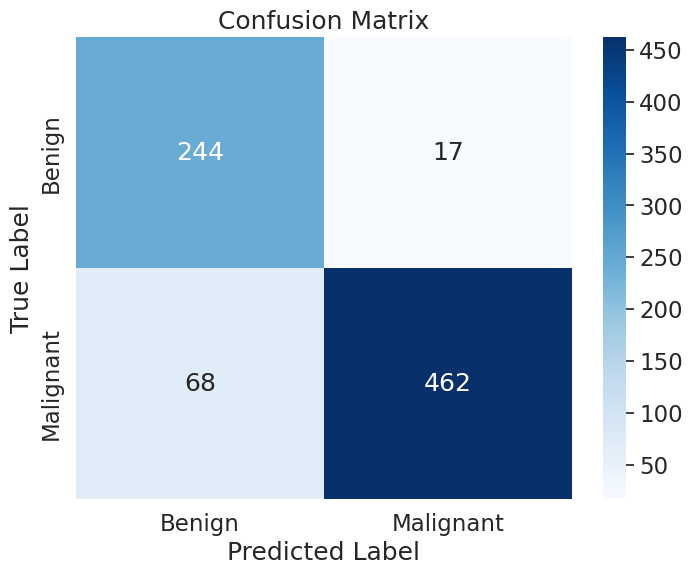

Test Loss: 0.2800, Test Accuracy: 89.25%

Classification Report:
              precision    recall  f1-score   support

      Benign       0.78      0.93      0.85       261
   Malignant       0.96      0.87      0.92       530

    accuracy                           0.89       791
   macro avg       0.87      0.90      0.88       791
weighted avg       0.90      0.89      0.89       791



wandb:                                                                                
wandb: 
wandb: Run history:
wandb:              AUC Epoch 1 ▁
wandb:             AUC Epoch 10 ▁
wandb:              AUC Epoch 2 ▁
wandb:              AUC Epoch 3 ▁
wandb:              AUC Epoch 4 ▁
wandb:              AUC Epoch 5 ▁
wandb:              AUC Epoch 6 ▁
wandb:              AUC Epoch 7 ▁
wandb:              AUC Epoch 8 ▁
wandb:              AUC Epoch 9 ▁
wandb: Best Validation Accuracy ▁▄▆█
wandb:                    epoch ▁▂▃▃▄▅▆▆▇█
wandb:            learning_rate ▁▁▁▁▁▁▁▁▁▁
wandb:           train_accuracy ▁▄▅▆▇▇▇███
wandb:               train_loss █▅▄▃▂▂▂▁▁▁
wandb:             val_accuracy ▇▇▄▁▇██▆▇▇
wandb:                 val_loss ▃▃▇█▃▁▁▄▆▂
wandb: 
wandb: Run summary:
wandb:              AUC Epoch 1 0.90098
wandb:             AUC Epoch 10 0.96328
wandb:              AUC Epoch 2 0.92954
wandb:              AUC Epoch 3 0.92221
wandb:              AUC Epoch 4 0.9531
wandb:              AUC

In [44]:
best_val_acc = 0
for epoch in range(1, config.epochs + 1):
    train_one_epoch(epoch)
    val_loss, val_acc = validate(epoch)
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")
        wandb.log({"Best Validation Accuracy": best_val_acc})
        print("Best model saved with accuracy:", best_val_acc)

# Final test
print("Loading best model for testing...")
model.load_state_dict(torch.load("best_model.pth"))
test_loss, test_acc = test()

wandb.finish()

In [45]:
# Avoid PIL errors with large images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Initialize Weights & Biases
wandb.init(project="breast-cancer-classification-main", config={
    "epochs": 10,
    "batch_size": 32,
    "learning_rate": 0.001,
    "img_size": 128,
    "model": "efficientnet_b0",
    "optimizer": "adam",
})
config = wandb.config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

wandb: Tracking run with wandb version 0.19.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250307_150212-v8ktnn2o
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run peach-cloud-8
wandb: ⭐️ View project at https://wandb.ai/manvanth_reddy/breast-cancer-classification-main
wandb: 🚀 View run at https://wandb.ai/manvanth_reddy/breast-cancer-classification-main/runs/v8ktnn2o


In [46]:
# Load ResNet50 model
model = models.efficientnet_b0(pretrained=True)

# Modify the classifier for binary classification (benign or malignant)
num_features = model.classifier[1].in_features  # Access the number of input features for the fully connected layer
model.classifier[1] = nn.Linear(num_features, 1)  # Single output node for binary classification with BCEWithLogitsLoss

# Move the model to the appropriate device
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 132MB/s] 


Training Epoch 1:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 1: 100%|██████████| 275/275 [00:50<00:00,  8.16it/s, loss=0.2310, accuracy=84.03%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 1: 100%|██████████| 275/275 [00:50<00:00,  5.45it/s, loss=0.2310, accuracy=84.03%]


Epoch 1 - Train Loss: 0.3774, Train Accuracy: 84.03%


Validation 1: 100%|██████████| 23/23 [00:04<00:00,  5.73it/s]


Epoch 1 - Validation Loss: 0.2494, Validation Accuracy: 91.57%
Best model saved with accuracy: 91.57303370786516


Training Epoch 2:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 2: 100%|██████████| 275/275 [00:50<00:00,  7.54it/s, loss=0.1176, accuracy=89.68%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 2: 100%|██████████| 275/275 [00:50<00:00,  5.43it/s, loss=0.1176, accuracy=89.68%]


Epoch 2 - Train Loss: 0.2574, Train Accuracy: 89.68%


Validation 2: 100%|██████████| 23/23 [00:03<00:00,  5.79it/s]


Epoch 2 - Validation Loss: 0.1892, Validation Accuracy: 93.40%
Best model saved with accuracy: 93.39887640449439


Training Epoch 3:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 3: 100%|██████████| 275/275 [00:50<00:00,  8.74it/s, loss=0.2193, accuracy=91.60%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 3: 100%|██████████| 275/275 [00:50<00:00,  5.49it/s, loss=0.2193, accuracy=91.60%]


Epoch 3 - Train Loss: 0.2197, Train Accuracy: 91.60%


Validation 3: 100%|██████████| 23/23 [00:04<00:00,  4.87it/s]


Epoch 3 - Validation Loss: 0.1832, Validation Accuracy: 92.13%


Training Epoch 4:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 4: 100%|█████████▉| 274/275 [00:49<00:00,  6.47it/s, loss=0.1619, accuracy=92.47%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 4: 100%|██████████| 275/275 [00:49<00:00,  5.57it/s, loss=0.1619, accuracy=92.47%]


Epoch 4 - Train Loss: 0.1891, Train Accuracy: 92.47%


Validation 4: 100%|██████████| 23/23 [00:04<00:00,  5.59it/s]


Epoch 4 - Validation Loss: 0.1673, Validation Accuracy: 93.82%
Best model saved with accuracy: 93.82022471910112


Training Epoch 5:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 5: 100%|██████████| 275/275 [00:50<00:00,  8.25it/s, loss=0.0878, accuracy=92.78%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 5: 100%|██████████| 275/275 [00:50<00:00,  5.45it/s, loss=0.0878, accuracy=92.78%]


Epoch 5 - Train Loss: 0.1760, Train Accuracy: 92.78%


Validation 5: 100%|██████████| 23/23 [00:04<00:00,  5.69it/s]


Epoch 5 - Validation Loss: 0.1570, Validation Accuracy: 94.38%
Best model saved with accuracy: 94.38202247191012


Training Epoch 6:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 6: 100%|██████████| 275/275 [00:50<00:00,  6.70it/s, loss=0.0503, accuracy=93.68%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 6: 100%|██████████| 275/275 [00:50<00:00,  5.46it/s, loss=0.0503, accuracy=93.68%]


Epoch 6 - Train Loss: 0.1643, Train Accuracy: 93.68%


Validation 6: 100%|██████████| 23/23 [00:04<00:00,  5.12it/s]


Epoch 6 - Validation Loss: 0.2227, Validation Accuracy: 91.71%


Training Epoch 7:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 7: 100%|██████████| 275/275 [00:50<00:00,  8.16it/s, loss=0.2980, accuracy=93.77%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 7: 100%|██████████| 275/275 [00:50<00:00,  5.45it/s, loss=0.2980, accuracy=93.77%]


Epoch 7 - Train Loss: 0.1623, Train Accuracy: 93.77%


Validation 7: 100%|██████████| 23/23 [00:03<00:00,  5.76it/s]


Epoch 7 - Validation Loss: 0.1919, Validation Accuracy: 93.12%


Training Epoch 8:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 8: 100%|█████████▉| 274/275 [00:50<00:00,  6.71it/s, loss=0.1239, accuracy=94.13%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 8: 100%|██████████| 275/275 [00:50<00:00,  5.42it/s, loss=0.1239, accuracy=94.13%]


Epoch 8 - Train Loss: 0.1466, Train Accuracy: 94.13%


Validation 8: 100%|██████████| 23/23 [00:04<00:00,  5.44it/s]


Epoch 8 - Validation Loss: 0.1491, Validation Accuracy: 94.80%
Best model saved with accuracy: 94.80337078651685


Training Epoch 9:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 9: 100%|██████████| 275/275 [00:50<00:00,  8.05it/s, loss=0.1164, accuracy=95.36%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 9: 100%|██████████| 275/275 [00:50<00:00,  5.45it/s, loss=0.1164, accuracy=95.36%]


Epoch 9 - Train Loss: 0.1300, Train Accuracy: 95.36%


Validation 9: 100%|██████████| 23/23 [00:03<00:00,  5.80it/s]


Epoch 9 - Validation Loss: 0.1601, Validation Accuracy: 93.96%


Training Epoch 10:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 10: 100%|██████████| 275/275 [00:49<00:00,  7.97it/s, loss=0.0739, accuracy=95.37%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 10: 100%|██████████| 275/275 [00:49<00:00,  5.52it/s, loss=0.0739, accuracy=95.37%]


Epoch 10 - Train Loss: 0.1208, Train Accuracy: 95.37%


Validation 10: 100%|██████████| 23/23 [00:03<00:00,  5.87it/s]
<ipython-input-47-dc0c9f6c943f>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.

Epoch 10 - Validation Loss: 0.2255, Validation Accuracy: 93.40%
Loading best model for testing...


Testing:   0%|          | 0/791 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Testing:  99%|█████████▉| 784/791 [00:11<00:00, 71.11it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Testing: 100%|██████████| 791/791 [00:11<00:00, 68.40it/s]



Confusion Matrix:
[[244  17]
 [ 17 513]]


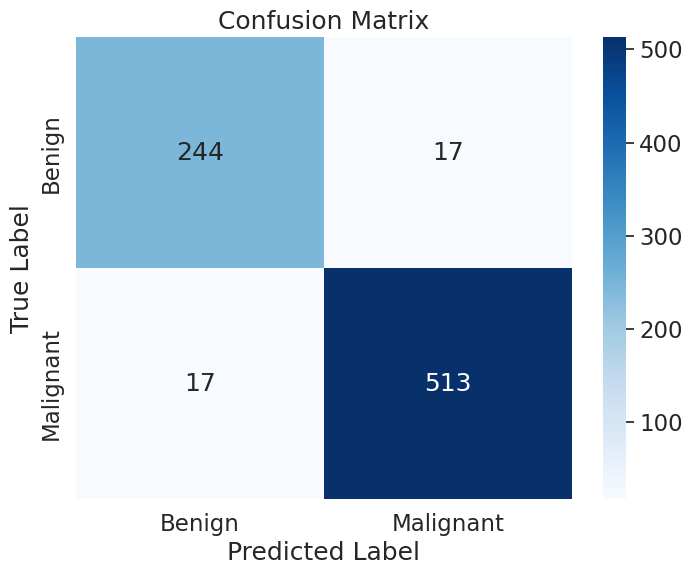

Test Loss: 0.1423, Test Accuracy: 95.70%

Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.93      0.93       261
   Malignant       0.97      0.97      0.97       530

    accuracy                           0.96       791
   macro avg       0.95      0.95      0.95       791
weighted avg       0.96      0.96      0.96       791



wandb:                                                                                
wandb: 
wandb: Run history:
wandb:              AUC Epoch 1 ▁
wandb:             AUC Epoch 10 ▁
wandb:              AUC Epoch 2 ▁
wandb:              AUC Epoch 3 ▁
wandb:              AUC Epoch 4 ▁
wandb:              AUC Epoch 5 ▁
wandb:              AUC Epoch 6 ▁
wandb:              AUC Epoch 7 ▁
wandb:              AUC Epoch 8 ▁
wandb:              AUC Epoch 9 ▁
wandb: Best Validation Accuracy ▁▅▆▇█
wandb:                    epoch ▁▂▃▃▄▅▆▆▇█
wandb:            learning_rate ▁▁▁▁▁▁▁▁▁▁
wandb:           train_accuracy ▁▄▆▆▆▇▇▇██
wandb:               train_loss █▅▄▃▃▂▂▂▁▁
wandb:             val_accuracy ▁▅▂▆▇▁▄█▆▅
wandb:                 val_loss █▄▃▂▂▆▄▁▂▆
wandb: 
wandb: Run summary:
wandb:              AUC Epoch 1 0.96929
wandb:             AUC Epoch 10 0.98271
wandb:              AUC Epoch 2 0.97899
wandb:              AUC Epoch 3 0.97636
wandb:              AUC Epoch 4 0.98131
wandb:              A

In [47]:
best_val_acc = 0
for epoch in range(1, config.epochs + 1):
    train_one_epoch(epoch)
    val_loss, val_acc = validate(epoch)
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")
        wandb.log({"Best Validation Accuracy": best_val_acc})
        print("Best model saved with accuracy:", best_val_acc)

# Final test
print("Loading best model for testing...")
model.load_state_dict(torch.load("best_model.pth"))
test_loss, test_acc = test()

wandb.finish()

In [48]:
# Avoid PIL errors with large images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Initialize Weights & Biases
wandb.init(project="breast-cancer-classification-main", config={
    "epochs": 10,
    "batch_size": 32,
    "learning_rate": 0.001,
    "img_size": 128,
    "model": "Densenet169",
    "optimizer": "adam",
})
config = wandb.config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

wandb: Tracking run with wandb version 0.19.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250307_151139-up9qofjc
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run expert-frost-10
wandb: ⭐️ View project at https://wandb.ai/manvanth_reddy/breast-cancer-classification-main
wandb: 🚀 View run at https://wandb.ai/manvanth_reddy/breast-cancer-classification-main/runs/up9qofjc


In [49]:
model = models.densenet169(pretrained=True)
num_features = model.classifier.in_features

model.classifier = nn.Linear(num_features,1)
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:00<00:00, 182MB/s]


Training Epoch 1:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 1: 100%|██████████| 275/275 [00:58<00:00,  5.58it/s, loss=0.4651, accuracy=79.62%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 1: 100%|██████████| 275/275 [00:58<00:00,  4.70it/s, loss=0.4651, accuracy=79.62%]


Epoch 1 - Train Loss: 0.4511, Train Accuracy: 79.62%


Validation 1: 100%|██████████| 23/23 [00:04<00:00,  5.34it/s]


Epoch 1 - Validation Loss: 0.5444, Validation Accuracy: 79.78%
Best model saved with accuracy: 79.7752808988764


Training Epoch 2:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 2: 100%|██████████| 275/275 [00:58<00:00,  6.87it/s, loss=0.2703, accuracy=85.07%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 2: 100%|██████████| 275/275 [00:58<00:00,  4.73it/s, loss=0.2703, accuracy=85.07%]


Epoch 2 - Train Loss: 0.3508, Train Accuracy: 85.07%


Validation 2: 100%|██████████| 23/23 [00:04<00:00,  5.31it/s]


Epoch 2 - Validation Loss: 0.2529, Validation Accuracy: 90.45%
Best model saved with accuracy: 90.4494382022472


Training Epoch 3:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 3: 100%|██████████| 275/275 [00:57<00:00,  6.76it/s, loss=0.3025, accuracy=85.98%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 3: 100%|██████████| 275/275 [00:57<00:00,  4.77it/s, loss=0.3025, accuracy=85.98%]


Epoch 3 - Train Loss: 0.3348, Train Accuracy: 85.98%


Validation 3: 100%|██████████| 23/23 [00:04<00:00,  5.58it/s]


Epoch 3 - Validation Loss: 0.2295, Validation Accuracy: 90.59%
Best model saved with accuracy: 90.58988764044943


Training Epoch 4:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 4: 100%|██████████| 275/275 [00:58<00:00,  6.79it/s, loss=0.3813, accuracy=87.44%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 4: 100%|██████████| 275/275 [00:58<00:00,  4.69it/s, loss=0.3813, accuracy=87.44%]


Epoch 4 - Train Loss: 0.2992, Train Accuracy: 87.44%


Validation 4: 100%|██████████| 23/23 [00:04<00:00,  5.45it/s]


Epoch 4 - Validation Loss: 0.2356, Validation Accuracy: 90.45%


Training Epoch 5:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 5: 100%|██████████| 275/275 [00:57<00:00,  6.61it/s, loss=0.2777, accuracy=87.40%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 5: 100%|██████████| 275/275 [00:58<00:00,  4.74it/s, loss=0.2777, accuracy=87.40%]


Epoch 5 - Train Loss: 0.2999, Train Accuracy: 87.40%


Validation 5: 100%|██████████| 23/23 [00:04<00:00,  5.57it/s]


Epoch 5 - Validation Loss: 0.2908, Validation Accuracy: 87.22%


Training Epoch 6:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 6: 100%|██████████| 275/275 [00:57<00:00,  6.54it/s, loss=0.3253, accuracy=88.80%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 6: 100%|██████████| 275/275 [00:57<00:00,  4.76it/s, loss=0.3253, accuracy=88.80%]


Epoch 6 - Train Loss: 0.2768, Train Accuracy: 88.80%


Validation 6: 100%|██████████| 23/23 [00:04<00:00,  5.24it/s]


Epoch 6 - Validation Loss: 0.3205, Validation Accuracy: 89.47%


Training Epoch 7:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 7: 100%|██████████| 275/275 [00:58<00:00,  6.79it/s, loss=0.2051, accuracy=88.60%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 7: 100%|██████████| 275/275 [00:58<00:00,  4.71it/s, loss=0.2051, accuracy=88.60%]


Epoch 7 - Train Loss: 0.2740, Train Accuracy: 88.60%


Validation 7: 100%|██████████| 23/23 [00:04<00:00,  4.84it/s]


Epoch 7 - Validation Loss: 0.2360, Validation Accuracy: 90.45%


Training Epoch 8:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 8: 100%|██████████| 275/275 [00:57<00:00,  6.77it/s, loss=0.1429, accuracy=89.79%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 8: 100%|██████████| 275/275 [00:57<00:00,  4.77it/s, loss=0.1429, accuracy=89.79%]


Epoch 8 - Train Loss: 0.2540, Train Accuracy: 89.79%


Validation 8: 100%|██████████| 23/23 [00:04<00:00,  4.83it/s]


Epoch 8 - Validation Loss: 0.2160, Validation Accuracy: 91.43%
Best model saved with accuracy: 91.43258426966293


Training Epoch 9:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 9: 100%|██████████| 275/275 [00:58<00:00,  6.77it/s, loss=0.1057, accuracy=89.86%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 9: 100%|██████████| 275/275 [00:58<00:00,  4.70it/s, loss=0.1057, accuracy=89.86%]


Epoch 9 - Train Loss: 0.2495, Train Accuracy: 89.86%


Validation 9: 100%|██████████| 23/23 [00:04<00:00,  5.06it/s]


Epoch 9 - Validation Loss: 0.3514, Validation Accuracy: 86.24%


Training Epoch 10:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 10: 100%|██████████| 275/275 [00:58<00:00,  6.87it/s, loss=0.3247, accuracy=90.14%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 10: 100%|██████████| 275/275 [00:58<00:00,  4.69it/s, loss=0.3247, accuracy=90.14%]


Epoch 10 - Train Loss: 0.2411, Train Accuracy: 90.14%


Validation 10: 100%|██████████| 23/23 [00:04<00:00,  5.67it/s]


Epoch 10 - Validation Loss: 0.4717, Validation Accuracy: 82.30%
Loading best model for testing...


<ipython-input-50-dc0c9f6c943f>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))
Testing:   0%|          | 0/791 [00:00<


Confusion Matrix:
[[231  30]
 [ 31 499]]


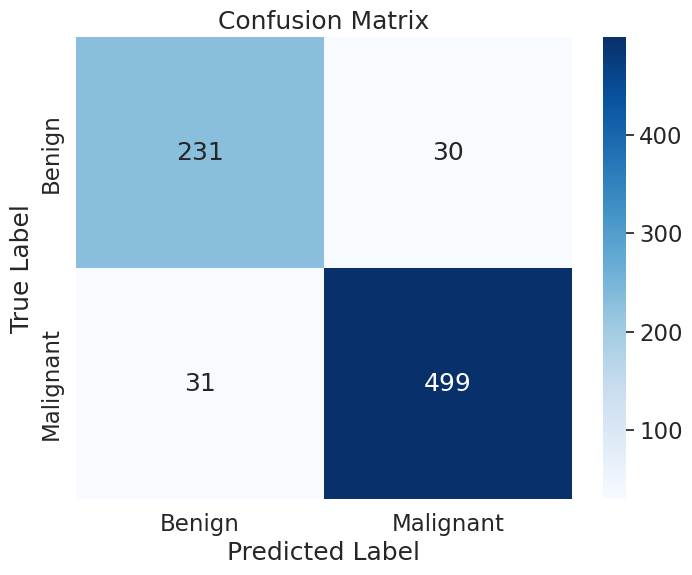

Test Loss: 0.2067, Test Accuracy: 92.29%

Classification Report:
              precision    recall  f1-score   support

      Benign       0.88      0.89      0.88       261
   Malignant       0.94      0.94      0.94       530

    accuracy                           0.92       791
   macro avg       0.91      0.91      0.91       791
weighted avg       0.92      0.92      0.92       791



wandb:                                                                                
wandb: 
wandb: Run history:
wandb:              AUC Epoch 1 ▁
wandb:             AUC Epoch 10 ▁
wandb:              AUC Epoch 2 ▁
wandb:              AUC Epoch 3 ▁
wandb:              AUC Epoch 4 ▁
wandb:              AUC Epoch 5 ▁
wandb:              AUC Epoch 6 ▁
wandb:              AUC Epoch 7 ▁
wandb:              AUC Epoch 8 ▁
wandb:              AUC Epoch 9 ▁
wandb: Best Validation Accuracy ▁▇▇█
wandb:                    epoch ▁▂▃▃▄▅▆▆▇█
wandb:            learning_rate ▁▁▁▁▁▁▁▁▁▁
wandb:           train_accuracy ▁▅▅▆▆▇▇███
wandb:               train_loss █▅▄▃▃▂▂▁▁▁
wandb:             val_accuracy ▁▇▇▇▅▇▇█▅▃
wandb:                 val_loss █▂▁▁▃▃▁▁▄▆
wandb: 
wandb: Run summary:
wandb:              AUC Epoch 1 0.93911
wandb:             AUC Epoch 10 0.96319
wandb:              AUC Epoch 2 0.95929
wandb:              AUC Epoch 3 0.96118
wandb:              AUC Epoch 4 0.96192
wandb:              AU

In [50]:
best_val_acc = 0
for epoch in range(1, config.epochs + 1):
    train_one_epoch(epoch)
    val_loss, val_acc = validate(epoch)
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")
        wandb.log({"Best Validation Accuracy": best_val_acc})
        print("Best model saved with accuracy:", best_val_acc)

# Final test
print("Loading best model for testing...")
model.load_state_dict(torch.load("best_model.pth"))
test_loss, test_acc = test()

wandb.finish()

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

# Define Data Augmentation (Equivalent to Keras layers.RandomBrightness, etc.)
data_transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.2),  # Random Brightness
    transforms.RandomHorizontalFlip(),       # Random Flip
    transforms.RandomRotation(20),           # Random Rotation
    transforms.ToTensor(),                   # Convert to Tensor
    transforms.Normalize((0.5,), (0.5,))     # Normalize
])

# Define Custom CNN Model
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()

        # Convolutional Block 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)

        # Convolutional Block 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Convolutional Block 3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Fully Connected Layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))  # GlobalAveragePooling2D
        self.fc1 = nn.Linear(128, 256)
        self.fc2 = nn.Linear(256, 32)
        self.fc3 = nn.Linear(32, 1)

        # Dropout layers
        self.dropout1 = nn.Dropout(0.4)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.2)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Conv Block 1
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Conv Block 2
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Conv Block 3

        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)  # Flatten before FC layers

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = self.fc3(x)
        x = torch.sigmoid(self.dropout3(x))  # Binary Classification Output

        return x

# Create Model Instance
custom_model = CustomCNN()
print(custom_model)

CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (dropout1): Dropout(p=0.4, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
  (dropout3): Dropout(p=0.2, inplace=False)
)


In [52]:
# Avoid PIL errors with large images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Initialize Weights & Biases
wandb.init(project="breast-cancer-classification-main", config={
    "epochs": 10,
    "batch_size": 32,
    "learning_rate": 0.001,
    "img_size": 128,
    "model": "Custom_model",
    "optimizer": "adam",
})
config = wandb.config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

wandb: Tracking run with wandb version 0.19.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250307_152245-hq65kpog
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run eternal-durian-12
wandb: ⭐️ View project at https://wandb.ai/manvanth_reddy/breast-cancer-classification-main
wandb: 🚀 View run at https://wandb.ai/manvanth_reddy/breast-cancer-classification-main/runs/hq65kpog


Training Epoch 1:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 1:  99%|█████████▉| 273/275 [00:47<00:00,  6.05it/s, loss=0.6085, accuracy=55.66%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 1: 100%|██████████| 275/275 [00:47<00:00,  5.76it/s, loss=0.6085, accuracy=55.66%]


Epoch 1 - Train Loss: 0.6522, Train Accuracy: 55.66%


Validation 1: 100%|██████████| 23/23 [00:03<00:00,  5.81it/s]


Epoch 1 - Validation Loss: 0.5028, Validation Accuracy: 74.02%
Best model saved with accuracy: 74.01685393258427


Training Epoch 2:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 2: 100%|█████████▉| 274/275 [00:48<00:00,  6.06it/s, loss=0.6337, accuracy=61.72%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 2: 100%|██████████| 275/275 [00:48<00:00,  5.67it/s, loss=0.6337, accuracy=61.72%]


Epoch 2 - Train Loss: 0.6417, Train Accuracy: 61.72%


Validation 2: 100%|██████████| 23/23 [00:03<00:00,  5.81it/s]


Epoch 2 - Validation Loss: 0.5041, Validation Accuracy: 74.16%
Best model saved with accuracy: 74.15730337078652


Training Epoch 3:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 3:  99%|█████████▉| 273/275 [00:48<00:00,  5.87it/s, loss=0.6610, accuracy=66.63%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 3: 100%|██████████| 275/275 [00:48<00:00,  5.71it/s, loss=0.6610, accuracy=66.63%]


Epoch 3 - Train Loss: 0.6373, Train Accuracy: 66.63%


Validation 3: 100%|██████████| 23/23 [00:03<00:00,  5.80it/s]


Epoch 3 - Validation Loss: 0.5156, Validation Accuracy: 75.14%
Best model saved with accuracy: 75.14044943820225


Training Epoch 4:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 4: 100%|█████████▉| 274/275 [00:48<00:00,  7.03it/s, loss=0.6709, accuracy=67.67%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 4: 100%|██████████| 275/275 [00:49<00:00,  5.61it/s, loss=0.6709, accuracy=67.67%]


Epoch 4 - Train Loss: 0.6394, Train Accuracy: 67.67%


Validation 4: 100%|██████████| 23/23 [00:04<00:00,  5.69it/s]


Epoch 4 - Validation Loss: 0.5019, Validation Accuracy: 78.65%
Best model saved with accuracy: 78.65168539325843


Training Epoch 5:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 5: 100%|██████████| 275/275 [00:47<00:00,  6.89it/s, loss=0.6409, accuracy=68.67%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 5: 100%|██████████| 275/275 [00:47<00:00,  5.83it/s, loss=0.6409, accuracy=68.67%]


Epoch 5 - Train Loss: 0.6336, Train Accuracy: 68.67%


Validation 5: 100%|██████████| 23/23 [00:04<00:00,  5.03it/s]


Epoch 5 - Validation Loss: 0.5275, Validation Accuracy: 84.83%
Best model saved with accuracy: 84.8314606741573


Training Epoch 6:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 6: 100%|█████████▉| 274/275 [00:46<00:00,  6.63it/s, loss=0.5946, accuracy=68.53%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 6: 100%|██████████| 275/275 [00:46<00:00,  5.89it/s, loss=0.5946, accuracy=68.53%]


Epoch 6 - Train Loss: 0.6364, Train Accuracy: 68.53%


Validation 6: 100%|██████████| 23/23 [00:03<00:00,  5.93it/s]


Epoch 6 - Validation Loss: 0.5168, Validation Accuracy: 84.69%


Training Epoch 7:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 7: 100%|██████████| 275/275 [00:48<00:00,  8.05it/s, loss=0.6148, accuracy=68.33%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 7: 100%|██████████| 275/275 [00:48<00:00,  5.69it/s, loss=0.6148, accuracy=68.33%]


Epoch 7 - Train Loss: 0.6332, Train Accuracy: 68.33%


Validation 7: 100%|██████████| 23/23 [00:03<00:00,  5.79it/s]


Epoch 7 - Validation Loss: 0.5057, Validation Accuracy: 85.96%
Best model saved with accuracy: 85.95505617977528


Training Epoch 8:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 8:  99%|█████████▉| 273/275 [00:47<00:00,  6.24it/s, loss=0.6831, accuracy=70.21%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 8: 100%|██████████| 275/275 [00:47<00:00,  5.75it/s, loss=0.6831, accuracy=70.21%]


Epoch 8 - Train Loss: 0.6318, Train Accuracy: 70.21%


Validation 8: 100%|██████████| 23/23 [00:03<00:00,  5.79it/s]


Epoch 8 - Validation Loss: 0.5295, Validation Accuracy: 84.27%


Training Epoch 9:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 9:  99%|█████████▉| 273/275 [00:48<00:00,  6.38it/s, loss=0.7051, accuracy=70.87%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 9: 100%|██████████| 275/275 [00:48<00:00,  5.66it/s, loss=0.7051, accuracy=70.87%]


Epoch 9 - Train Loss: 0.6322, Train Accuracy: 70.87%


Validation 9: 100%|██████████| 23/23 [00:04<00:00,  5.61it/s]


Epoch 9 - Validation Loss: 0.5201, Validation Accuracy: 75.84%


Training Epoch 10:   0%|          | 0/275 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 10:  99%|█████████▉| 273/275 [00:48<00:00,  5.96it/s, loss=0.5392, accuracy=70.42%]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Training Epoch 10: 100%|██████████| 275/275 [00:48<00:00,  5.70it/s, loss=0.5392, accuracy=70.42%]


Epoch 10 - Train Loss: 0.6341, Train Accuracy: 70.42%


Validation 10: 100%|██████████| 23/23 [00:04<00:00,  5.24it/s]
<ipython-input-53-5c9902e5ad2c>:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.

Epoch 10 - Validation Loss: 0.4967, Validation Accuracy: 78.79%
Loading best model for testing...


Testing:   0%|          | 0/791 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Testing:  98%|█████████▊| 772/791 [00:05<00:00, 160.10it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Testing: 100%|██████████| 791/791 [00:05<00:00, 149.73it/s]



Confusion Matrix:
[[179  82]
 [ 31 499]]


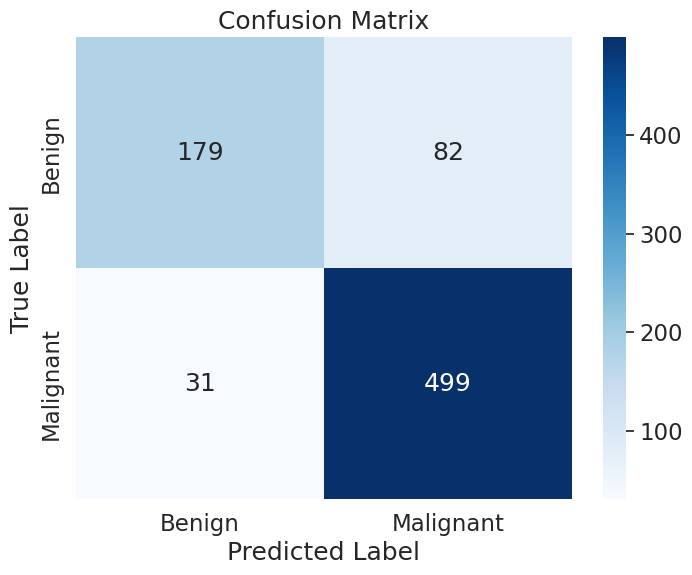

Test Loss: 0.5195, Test Accuracy: 85.71%

Classification Report:
              precision    recall  f1-score   support

      Benign       0.85      0.69      0.76       261
   Malignant       0.86      0.94      0.90       530

    accuracy                           0.86       791
   macro avg       0.86      0.81      0.83       791
weighted avg       0.86      0.86      0.85       791



wandb:                                                                                
wandb: 
wandb: Run history:
wandb:              AUC Epoch 1 ▁
wandb:             AUC Epoch 10 ▁
wandb:              AUC Epoch 2 ▁
wandb:              AUC Epoch 3 ▁
wandb:              AUC Epoch 4 ▁
wandb:              AUC Epoch 5 ▁
wandb:              AUC Epoch 6 ▁
wandb:              AUC Epoch 7 ▁
wandb:              AUC Epoch 8 ▁
wandb:              AUC Epoch 9 ▁
wandb: Best Validation Accuracy ▁▁▂▄▇█
wandb:                    epoch ▁▂▃▃▄▅▆▆▇█
wandb:            learning_rate ▁▁▁▁▁▁▁▁▁▁
wandb:           train_accuracy ▁▄▆▇▇▇▇███
wandb:               train_loss █▄▃▄▂▃▁▁▁▂
wandb:             val_accuracy ▁▁▂▄▇▇█▇▂▄
wandb:                 val_loss ▂▃▅▂█▅▃█▆▁
wandb: 
wandb: Run summary:
wandb:              AUC Epoch 1 0.85236
wandb:             AUC Epoch 10 0.84386
wandb:              AUC Epoch 2 0.84901
wandb:              AUC Epoch 3 0.82893
wandb:              AUC Epoch 4 0.83693
wandb:              

In [53]:
# Replace DenseNet169 with CustomCNN
model = CustomCNN().to(device)

# Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss()  # No Sigmoid in the final layer
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

# Training Loop remains the same
best_val_acc = 0
for epoch in range(1, config.epochs + 1):
    train_one_epoch(epoch)
    val_loss, val_acc = validate(epoch)
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")
        wandb.log({"Best Validation Accuracy": best_val_acc})
        print("Best model saved with accuracy:", best_val_acc)

# Final test
print("Loading best model for testing...")
model.load_state_dict(torch.load("best_model.pth"))
test_loss, test_acc = test()

wandb.finish()